<a href="https://colab.research.google.com/github/marcocaggioni/microrheology_water_test/blob/main/colab_Example_Differential_dynamic_microscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/marcocaggioni/microrheology_water_test/releases/download/1.0/400nm_100dil_water_01umpix_100fps_short.cin
!wget https://github.com/marcocaggioni/microrheology_water_test/releases/download/1.0/400nm_water_01umpix_100fps_short.cine
!wget https://github.com/marcocaggioni/microrheology_water_test/raw/main/DDM.py
!pip install trackpy
!pip install pims
!pip install lmfit

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets.widgets import interact, interactive, fixed
import ipywidgets as widgets
from scipy import fftpack
from PIL import Image
import pims

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1654784/45929032 bytes (3.6%)4628480/45929032 bytes (10.1%)7872512/45929032 bytes (17.1%)11157504/45929032 bytes (24.3%)14286848/45929032 bytes (31.1%)17334272/45929032 bytes (37.7%)20463616/45929032 bytes (44.6%)23683072/45929032 bytes (51.6%)26902528/45929032 bytes (58.6%)29974528/45929032 bytes (65.3%)33284096/45929032 bytes (72.5%)36495360/45929032 bytes (79.5%)

# Differential Dinamic Microscopy analysis

based on:

Cerbino, Roberto, and Veronique Trappe. "Differential dynamic microscopy: probing wave vector dependent dynamics with a microscope." Physical review letters 100.18 (2008): 188102.

In [5]:
info_dict={'interval': 0.01,
 'filename': '400nm_100dil_water_01umpix_100fps_short.cin',
 'muperpix': 0.1,
 'tracer_radius': 0.2,
 'temperature': 25,
 'operator': 'Marco'}

In [7]:
import pims
import trackpy

pims_video=pims.Cine('400nm_100dil_water_01umpix_100fps_short.cin')

Frame([[132, 129, 125, ..., 127, 125, 129],
       [117, 115, 117, ..., 119, 119, 117],
       [119, 120, 118, ..., 123, 123, 123],
       ...,
       [129, 128, 127, ..., 127, 126, 129],
       [122, 125, 125, ..., 124, 122, 122],
       [116, 117, 115, ..., 116, 117, 115]], dtype=uint8)
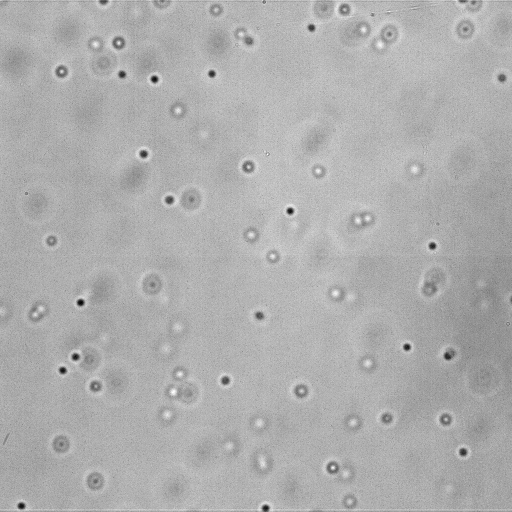

In [8]:
pims_video[1]

In [11]:
import DDM

In [12]:
DDM.browse_images_FFT(pims_video)

interactive(children=(IntSlider(value=150, description='framenum', max=300), IntSlider(value=100, description=…

In [13]:
pims_video=DDM.calculate_DDM(pims_video,naverage=20,numdt=20,interval=0.01,muperpix=0.1)

Text(value='', description='current differential frame realization')

Text(value='0', description='current dt')

In [14]:
DDM.explore_iq_dt(pims_video, interval=0.01)

interactive(children=(IntSlider(value=180, description='selectq', max=360, min=1), IntSlider(value=8, descript…

$$g(q,\tau) = A(q) [1-f(q,\tau)] +B(q)$$

$$f(q,\tau) = e^{-Dq^2 \tau}$$

$$ \tau=\frac{D}{q^2}$$

Text(0, 0.5, 'q')

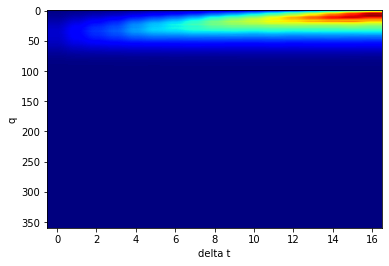

In [15]:
plt.imshow(pims_video.result_FFT.transpose(),cmap='jet',aspect='auto')
plt.xlabel("delta t")
plt.ylabel('q')

0.0007422874212593678


0.0007422874212593678

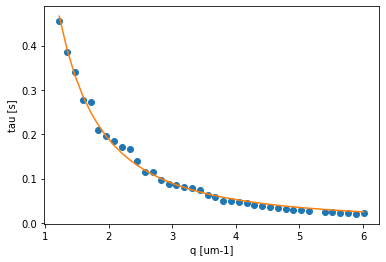

In [16]:
DDM.calculate_viscosity(pims_video,radius=0.2,muperpix=0.1,qmin=10,qmax=50)

In [18]:
pims_video_conc=pims.Cine('400nm_water_01umpix_100fps_short.cine')

info_dict={'interval': 0.01,
 'filename': '400nm_water_01umpix_100fps_short.cine',
 'muperpix': 0.1,
 'tracer_radius': 0.2,
 'temperature': 25,
 'operator': 'Marco'}

In [19]:
DDM.browse_images_FFT(pims_video_conc)

interactive(children=(IntSlider(value=150, description='framenum', max=301), IntSlider(value=101, description=…

In [20]:
pims_video_conc=DDM.calculate_DDM(pims_video_conc,naverage=20,numdt=20)

Text(value='', description='current differential frame realization')

Text(value='0', description='current dt')

In [21]:
DDM.explore_iq_dt(pims_video_conc)

interactive(children=(IntSlider(value=180, description='selectq', max=360, min=1), IntSlider(value=8, descript…

Text(0, 0.5, 'q')

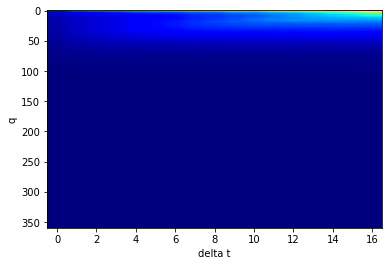

In [22]:
plt.imshow(pims_video_conc.result_FFT.transpose(),cmap='jet',aspect='auto')
plt.xlabel("delta t")
plt.ylabel('q')

0.06574031949186693


0.06574031949186693

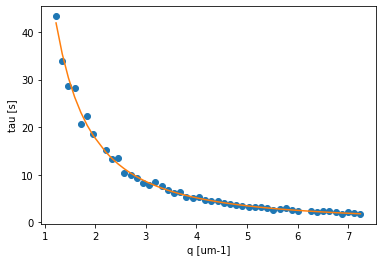

In [23]:
DDM.calculate_viscosity(pims_video_conc,radius=0.2,muperpix=0.1,qmin=10,qmax=60)